In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Peak

In [22]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% 
    dplyr::mutate(Peak = paste(Chrom, Start, End, sep="_")) %>%
    dplyr::mutate(Annotation = "ATAC", Label = "OCR")

dat_peak_atac_wgs = dat
print(dim(dat))
head(dat)

[1] 247520      6


Chrom,Start,End,Peak,Annotation,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10015,10442,chr1_10015_10442,ATAC,OCR
chr1,14253,14645,chr1_14253_14645,ATAC,OCR
chr1,16015,16477,chr1_16015_16477,ATAC,OCR
chr1,17237,17772,chr1_17237_17772,ATAC,OCR
chr1,28903,29613,chr1_28903_29613,ATAC,OCR
chr1,30803,31072,chr1_30803_31072,ATAC,OCR


## Enhancer

In [16]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.summary.enhancer_zscore_junke_peak_starr.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% dplyr::mutate(Label = "Enhancer_STARR")

dat_peak_annot_enh_zscore = dat
print(dim(dat))
head(dat)

[1] 14856     5


Peak,Annotation,Label,Count,Note
<chr>,<chr>,<chr>,<dbl>,<chr>
chr10_100185017_100187275,Enhancer,Enhancer_STARR,1,WSTARR
chr10_100346328_100347693,Enhancer,Enhancer_STARR,2,WSTARR|WSTARR
chr10_100373060_100374238,Enhancer,Enhancer_STARR,2,WSTARR|WSTARR
chr10_100528900_100530538,Enhancer,Enhancer_STARR,1,WSTARR
chr10_100535377_100536237,Enhancer,Enhancer_STARR,1,WSTARR
chr10_100912166_100913618,Enhancer,Enhancer_STARR,1,WSTARR


## TSS-Pol2

In [3]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "annotation_tss_pol2_span")
fname = "description.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_cnames = dat
print(dim(dat))
dat

[1] 6 2


Name,Description
<chr>,<chr>
Chrom,Chromosome
Start,Start position
End,End position
Name,Name
Score,Pol2 score
Gene,Gene of the TSS


In [19]:
###
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    "annotation_tss_pol2_span")

fname = "peak.annotation.K562.TSS.highest_Pol2.0_1K.bed.gz"
fpath = file.path(fdiry, fname)


### read data
cnames = dat_cnames$Name
cnames = c("Chrom_ATAC", "Start_ATAC", "End_ATAC", cnames, "Overlap")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)

### 
dat = dat %>% 
    dplyr::mutate(
        Peak_ATAC  = paste(Chrom_ATAC, Start_ATAC, End_ATAC, sep="_"),
        Annotation = "TSS-POL2",
        Label      = "Proximal",
        Note       = Name
    ) %>%
    dplyr::mutate(Note = str_remove(Note, fixed(":+"))) %>%
    dplyr::mutate(Note = str_remove(Note, fixed(":-")))

dat = dat %>% 
    dplyr::select(Peak_ATAC, Annotation, Label, Note) %>% 
    dplyr::rename("Peak" = "Peak_ATAC") %>%
    dplyr::distinct()

dat_peak_annot_tss_pol2_span = dat
print(dim(dat))
head(dat)

[1] 16234     4


Peak,Annotation,Label,Note
<chr>,<chr>,<chr>,<chr>
chr1_30803_31072,TSS-POL2,Proximal,chr1:30365-30366:0-1K
chr1_180982_182087,TSS-POL2,Proximal,chr1:182387-182388:0-1K
chr1_777949_779437,TSS-POL2,Proximal,chr1:778634-778635:0-1K
chr1_816774_817547,TSS-POL2,Proximal,chr1:817370-817371:0-1K
chr1_817905_818348,TSS-POL2,Proximal,chr1:817370-817371:0-1K
chr1_826754_828040,TSS-POL2,Proximal,chr1:827522-827523:0-1K


## Start labeling

In [31]:
dat = dat_peak_atac_wgs 
dat = dat %>% dplyr::select(Chrom, Start, End, Peak, Label)

lst = list(dat_peak_annot_tss_pol2_span, dat_peak_annot_enh_zscore)
for (dat_annot in lst){
    vec = dat_annot$Peak
    lab = unique(dat_annot$Label)
    
    cat(lab, "\n")
    dat = dat %>% 
        dplyr::mutate(
            Label = ifelse(
                Peak %in% vec,
                paste(Label, lab, sep=":"),
                Label
            )
        )
}

dat_peak_label = dat
print(dim(dat))
head(dat)

Proximal 
Enhancer_STARR 
[1] 247520      5


Chrom,Start,End,Peak,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,10015,10442,chr1_10015_10442,OCR
chr1,14253,14645,chr1_14253_14645,OCR
chr1,16015,16477,chr1_16015_16477,OCR
chr1,17237,17772,chr1_17237_17772,OCR
chr1,28903,29613,chr1_28903_29613,OCR
chr1,30803,31072,chr1_30803_31072,OCR:Proximal


In [32]:
dat = dat_peak_label
table(dat$Label)


                        OCR          OCR:Enhancer_STARR 
                     223469                       10026 
               OCR:Proximal OCR:Proximal:Enhancer_STARR 
                       9195                        4830 

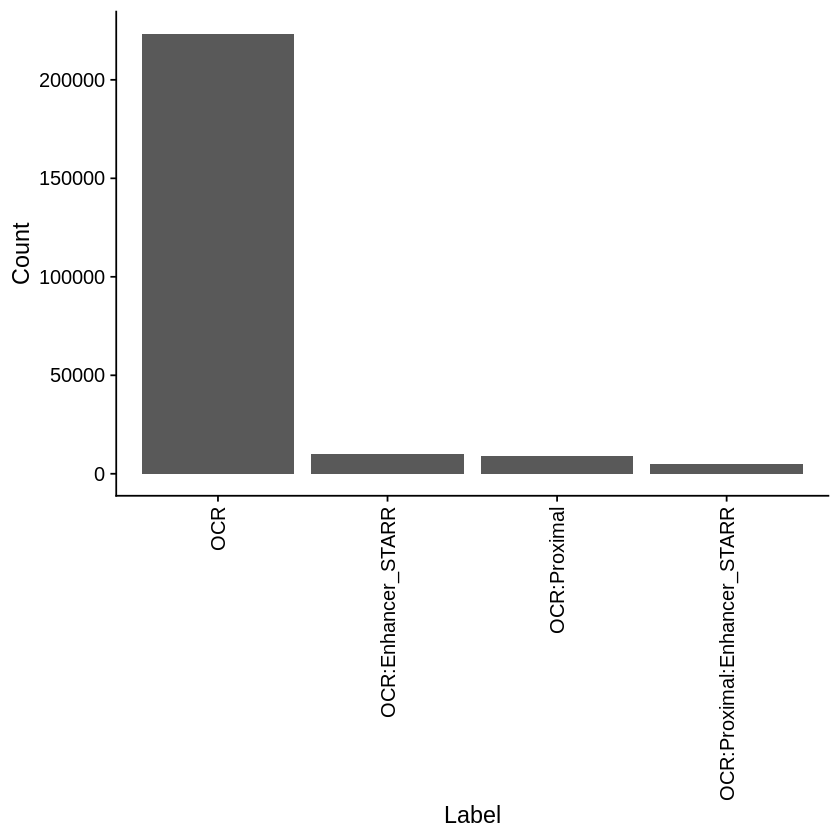

In [38]:
dat = dat_peak_label
dat = as.data.frame(table(dat$Label))

gpt = ggplot(dat, aes(x=Var1, y=Freq)) +
    geom_col() +
    labs(x="Label", y="Count") +
    theme_cowplot() +
    theme(axis.text.x = element_text(angle=90, hjust=1, vjust=0.5))

print(gpt)